# Fundamentals of Machine Learning - Exercise 1
The aim of the exercise is to get an overview of the basic capabilities of the Pandas, Matplotlib and Seaborn libraries and be able to setup a Python Virtual Enviroment (`venv`)

**Jupyter lab**

* Add code
* Add text
* Execute command
* Shortcuts (a, b, dd, Ctrl+Enter, Shift+Enter, x, c, v)

**Alternatives**

* Google Colab ([Colaboratory](https://colab.research.google.com/))
* Python scripts in VS Code

"![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_01_meme_01.png?raw=true)

# Data processing

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## The first step is to load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv')

## We shloud take a look on the data after loading so we know that everything is OK

### We will start with showing first/last N rows
- There are several ways of doing that:
    - name of the dataframe
    - head()
    - tail()

### Show 5 first and last rows

In [4]:
first_last = pd.concat([df.head(5),df.tail(5)])
first_last

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Show first 5 rows

In [7]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Show last 20 rows

In [5]:
df.tail(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
1444,1445,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000


## If we want to know if there are any missing values, the isna() function may render useful

In [8]:
df.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


## We can show summary of common statistical characteristic of the data using the describe() function

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 💡 Dataframe has several useful properties
    - shape
    - dtypes
    - columns
    - index

#### Row and column count

In [13]:
df.shape

(1460, 81)

#### Datatypes of columns

In [14]:
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


#### Column names

In [15]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Row index values

In [16]:
df.index

RangeIndex(start=0, stop=1460, step=1)

## We may want to work with just one column not the whole dataframe
- We will select only the SalePrice columns and save it to another variable

In [18]:
sales = df['SalePrice']
sales

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


## Columns are called Pandas Series - it shares a common API with Pandas DataFrame
- 💡 Pandas is numpy-backed so we can use Series as standard numpy arrays without any issues using the .values property

In [19]:
sales_values = df['SalePrice'].values
sales_values

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

## Find maximum price using Numpy and Pandas

In [20]:
df['SalePrice'].max()

755000

In [21]:
sales_values.max()

np.int64(755000)

## Data filtering using Pandas DataFrame
- There are several ways of filtering the data (similar logic to .Where() in C# or WHERE in SQL)
- 💡 We usually work with two indexers - .loc[] and .iloc[]

### The .iloc[] indexer works with positional indexes - very close to the way of working with the raw arrays
### The .loc[] indexer works with column names and logical expressions

### Select all rows and 3rd column of dataframe

### Select all rows and LAST column of dataframe

### Select 4th to 10th row and all columns

### Select 2nd to 13th row and 3rd column

## Select only a subset of columns to a new dataframe
* 'Id', 'SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr'

In [ ]:
df = df_full.loc[:, ['Id', 'SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']].copy()
df.head()

### Select only houses built in year 2000 or later
* YearBuilt

### Select only houses that don't use GasA for heating (!= or ~ operators)
* Heating

### Select houses cheaper than 180k USD and with at least 2 bedrooms
* SalePrice, BedroomAbvGr

### Select houses with 2 stories or air conditioning
* HouseStyle, CentralAir

# We can add new columns to the DataFrame as well

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_01_meme_02.png?raw=true)

### Add a new column named Age for each house (current year - year built)
* YearBuilt

In [27]:
df['Age'] = 2022 - df['YearBuilt']
df['Age'].head()

,Age
0,19
1,46
2,21
3,107
4,22


### Add a new column IsLuxury with True value for houses with more than 3 bedrooms and price above 214k USD (.loc)
- How many luxury houses are in the dataset?
- SalePrice, BedroomAbvGr

In [30]:
df['IsLuxury'] = (df['BedroomAbvGr'] > 3) & (df['SalePrice'] > 214000)
num_luxury = df['IsLuxury'].sum()
num_luxury

np.int64(96)

## Pandas enables us to use aggregation functions for the data using the .groupby() function

### Compute counts for all the heating methods (groupby / value_counts)
* Heating

In [31]:
df.groupby('Heating')['Heating'].count()

,Heating
Heating,
Floor,1
GasA,1428
GasW,18
Grav,7
OthW,2
Wall,4


In [32]:
df['Heating'].value_counts()

,count
Heating,
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


# Visualization

## Scatter plot
- Visualize relationship between SalePrice and GrLivArea.
- Use scatter plot from **Matplotlib**.

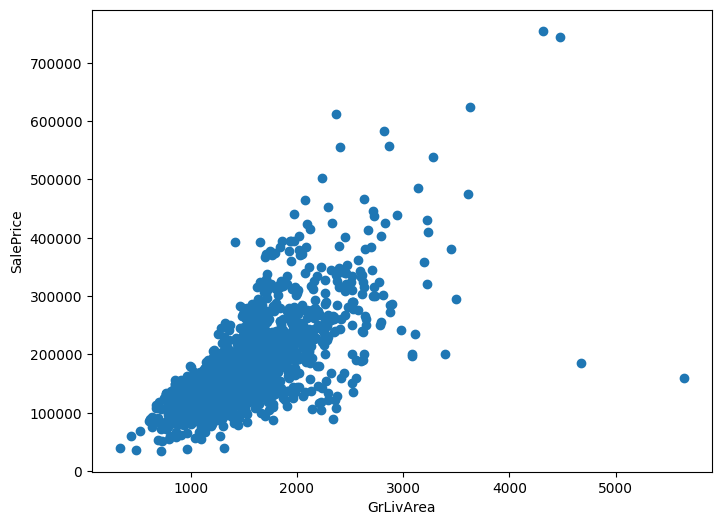

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

### Modify figure size and add title

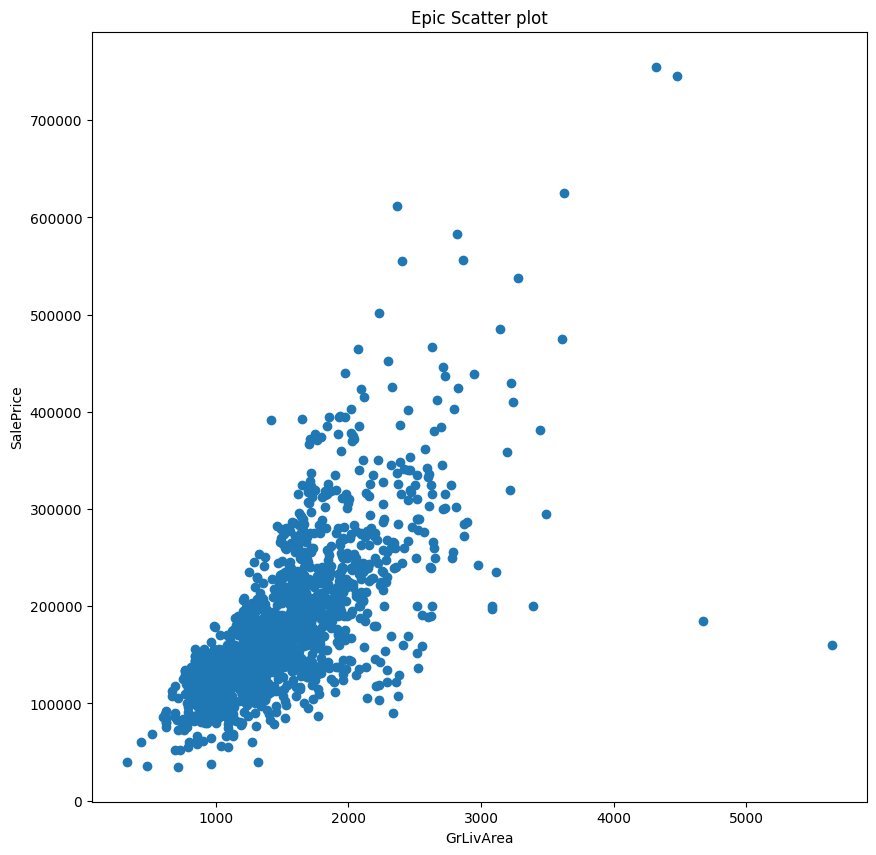

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Epic Scatter plot')
plt.show()

### Add axis labels

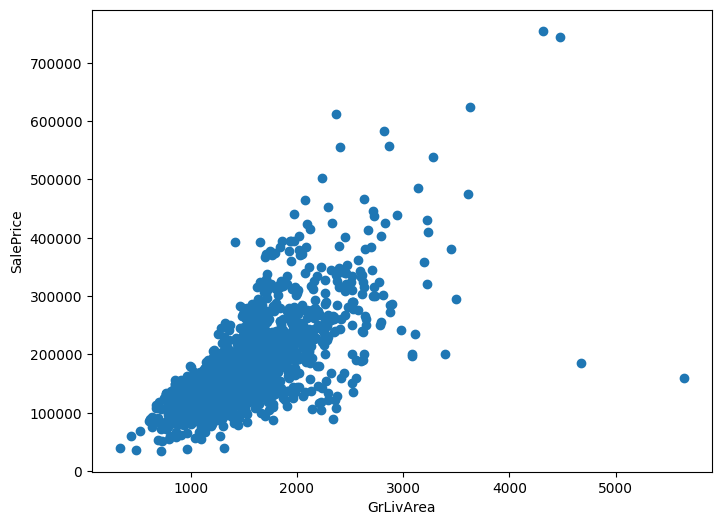

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

### Add colors for data points based on CentralAir value.

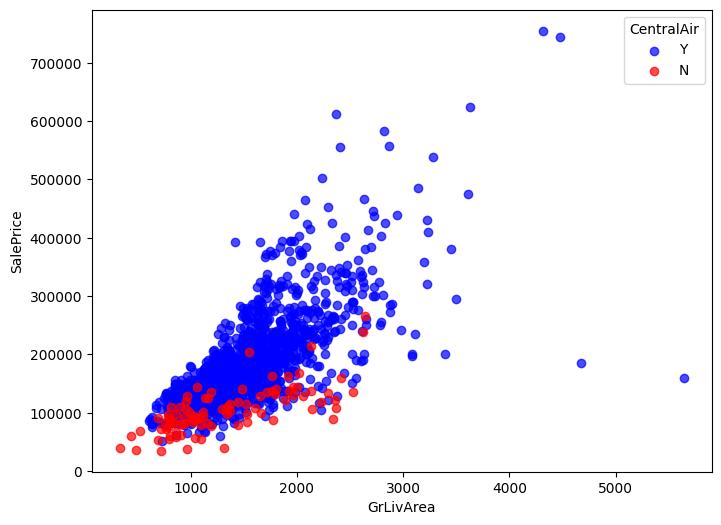

In [38]:
plt.figure(figsize=(8,6))

# Map CentralAir values to colors
colors = {'Y': 'blue', 'N': 'red'}

for value, color in colors.items():
    subset = df[df['CentralAir'] == value]
    plt.scatter(subset['GrLivArea'], subset['SalePrice'], c=color, label=value, alpha=0.7)

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(title='CentralAir')
plt.show()

## Try to use scatterplot from **Seaborn** library for scatter plot visualization.

#### Use dataframe as source and column names for axes data

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

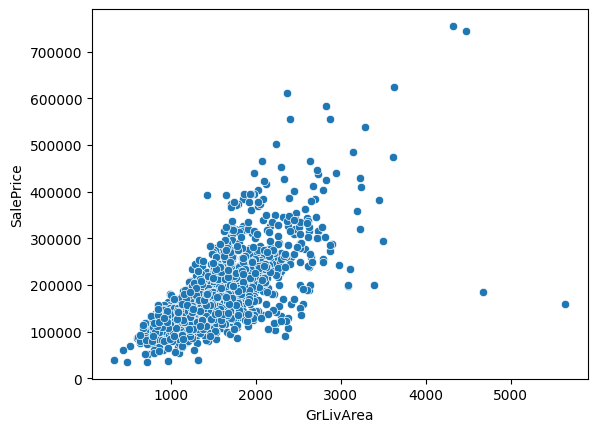

In [39]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')

### Resize plot and add color for markers based on CentralAir column

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

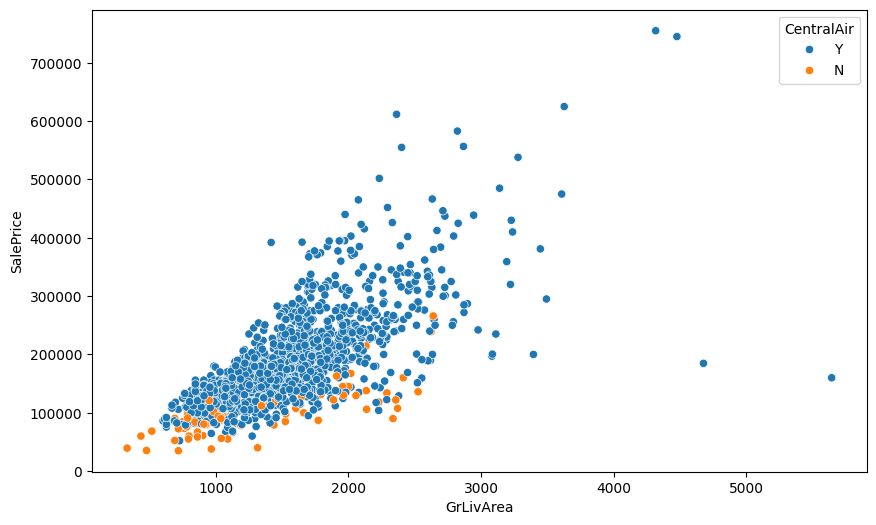

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='CentralAir')

## Line plot
- Calculate and vizualize average house price in relationship to YearBuild.

In [44]:
avg_prices = df.groupby('YearBuilt', as_index=False)['SalePrice'].mean()




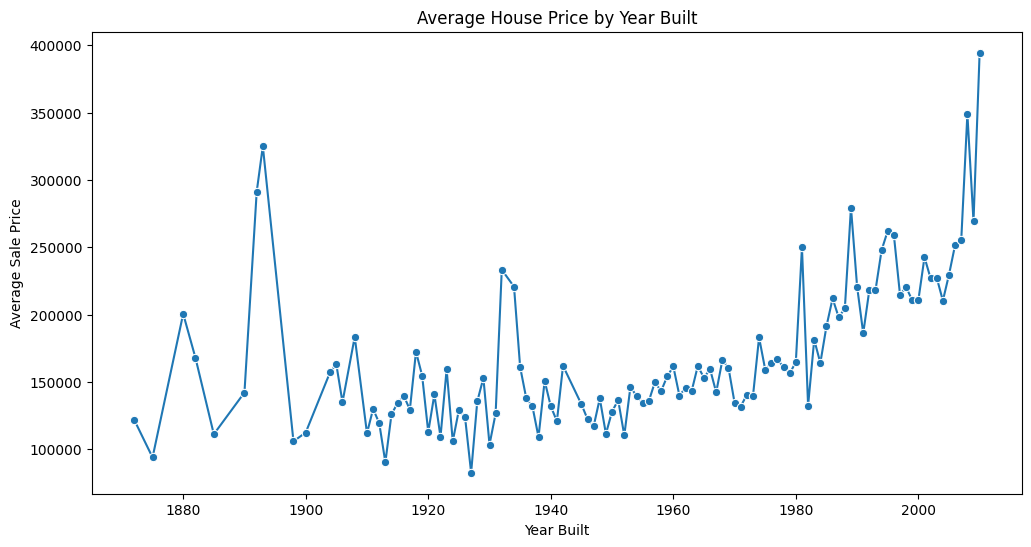

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_prices, x='YearBuilt', y='SalePrice', marker="o")

plt.title("Average House Price by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Average Sale Price")
plt.show()

## Bar plot
- Calculate and vizualize how many of houses have CentralAir
- Use Barplot for visualization

In [47]:
no_air = df['CentralAir'].value_counts()['N']
yes_air = df['CentralAir'].value_counts()['Y']

<Axes: >

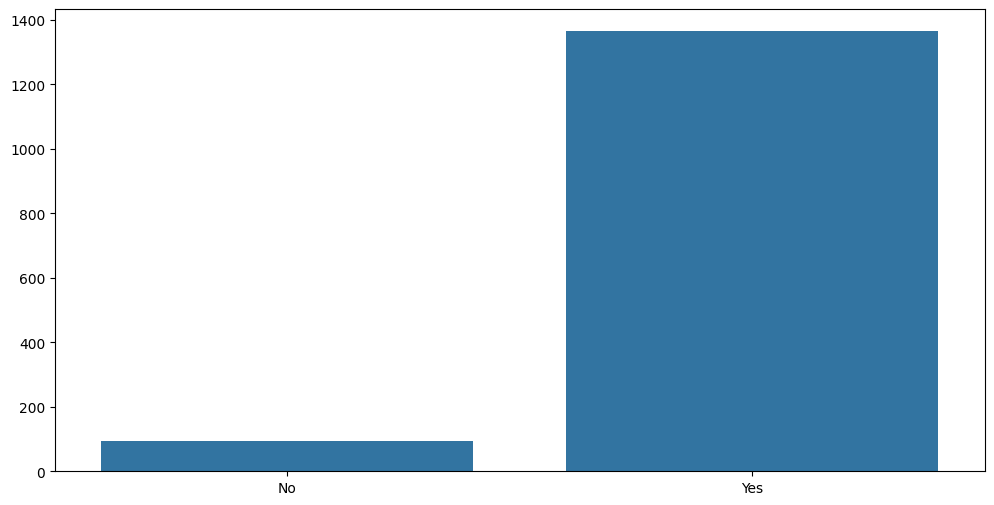

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x=['No', 'Yes'], y=[no_air, yes_air])


### Vizualize number of building type and if they contains air conditioning using Seaborn

<Axes: xlabel='BldgType', ylabel='count'>

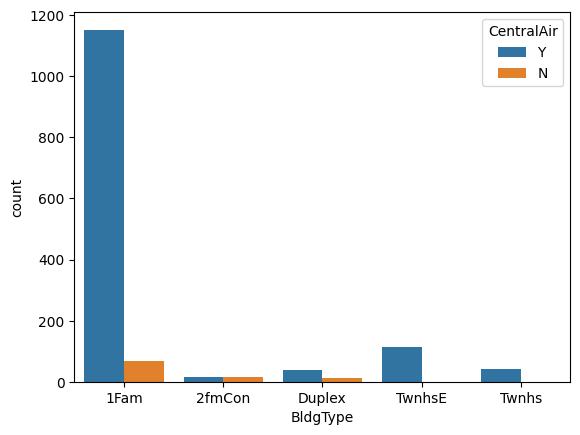

In [51]:
sns.countplot(data=df, x='BldgType', hue='CentralAir')

# Tasks
## ✅ Pandas (1 pt)
* Add a new column *Undervalued* which is set to True in case that the house is priced bellow 163k USD and has both OverallQual and OverallCond higher than 5.

* **How many undervalued houses are in the dataset?**

## ✅ Vizualization (1 pt)
* Add to dataframe new attribute determining if the house was build before or after year 2000.

* **Create bar chart for number of houses depending on type of dwelling (attribute BldgType, use as a category axis) and added binary attribute about house age (use as a bar color).**

In [53]:
df['Undervalued'] = (df['SalePrice'] < 163000) & (df['OverallQual'] > 5) & (df['OverallCond'] > 5)
df['Undervalued'].sum()

np.int64(120)

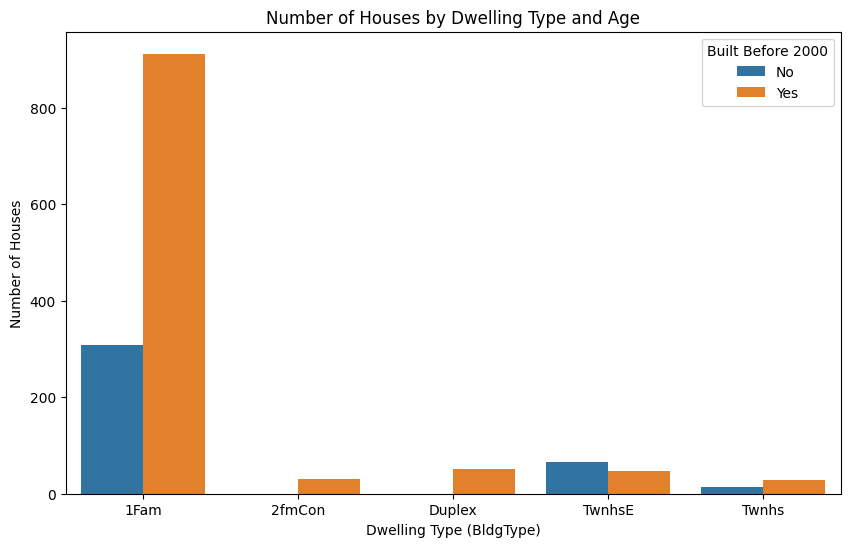

In [55]:
df['before2K'] = df['YearBuilt'] < 2000
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="BldgType", hue="before2K")

plt.title("Number of Houses by Dwelling Type and Age")
plt.xlabel("Dwelling Type (BldgType)")
plt.ylabel("Number of Houses")
plt.legend(title="Built Before 2000", labels=["No", "Yes"])
plt.show()